In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

url = "https://raw.githubusercontent.com/willi0815/studium/main/edlich-kmeans-A0.csv"
ds = pd.read_csv(url)
ds.head()

,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216


In [4]:
x = ds[["V1", "V2", "V3"]]
scaler = StandardScaler()
x_transform = scaler.fit_transform(x)

Bestimmung des k-Wertes

In [5]:
scores = []
for i in range(2, 10):
    model = KMeans(n_clusters = i)
    model.fit(x_transform)
    scores.append(model.inertia_)

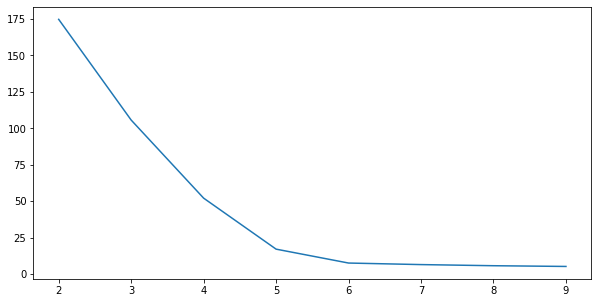

In [28]:
plt.figure(figsize=(10,5))
plt.plot(range(2, 10), scores)
plt.show()

Die Grafik zeigt einen optimalen k-Wert von 5, vielleicht auch noch 6. Für die weitere Abarbeitung wird k= 5 verwendet.

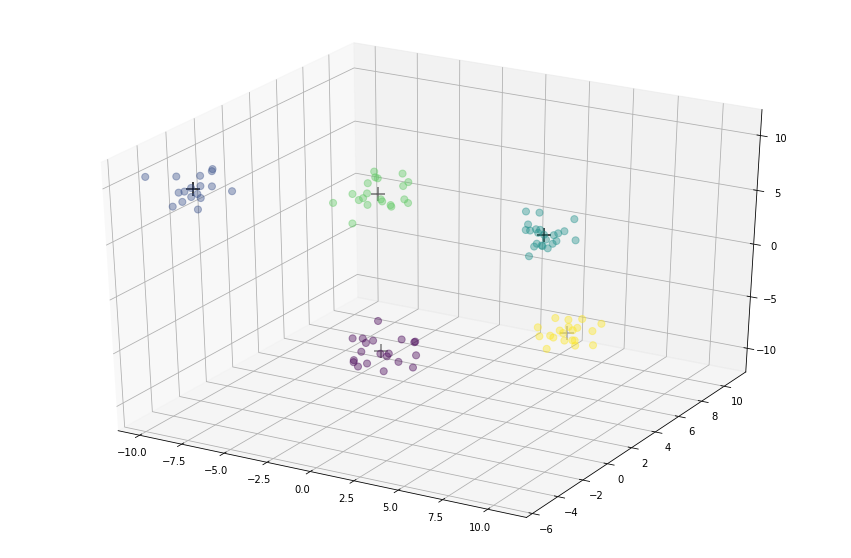

In [26]:
model = KMeans(n_clusters = 5)
model.fit(x_transform)

fi = plt.figure(figsize=(15, 10))
pr = fi.add_subplot(111, projection='3d')
center = model.cluster_centers_
center_transform= scaler.inverse_transform(center)

pr.scatter(ds["V1"], ds["V2"], ds["V3"], c=[model.labels_], s= 50, alpha = 0.4)
pr.scatter(center_transform[:, 0], 
           center_transform[:, 1], 
           center_transform[:, 2], 
           marker="+",
           c="black" , 
           s=200 )
plt.show()